### Inferential Statistics - Numerical Variables Correlations Analysis

In [1]:
# Import libraries

import pandas as pd

import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read numerical columns from dataset_statistics.csv

numerical_raw = pd.read_csv('dataset_statistics.csv', sep=',', usecols=['Income', 'Price', 'Quantity', 'Total'])

print('Dataframe Size: %d rows x %d columns' % numerical_raw.shape)

print('\nDataframe Preview:')
print(numerical_raw.head())

print('\nDataframe Structure:')
print(numerical_raw.info())

Dataframe Size: 20 rows x 4 columns

Dataframe Preview:
    Income   Price  Quantity    Total
0   600000  100000         4   400000
1  1200000  250000         4  1000000
2   950000  250000         3   750000
3   400000  100000         2   200000
4  1200000  250000         4  1000000

Dataframe Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Income    20 non-null     int64
 1   Price     20 non-null     int64
 2   Quantity  20 non-null     int64
 3   Total     20 non-null     int64
dtypes: int64(4)
memory usage: 768.0 bytes
None


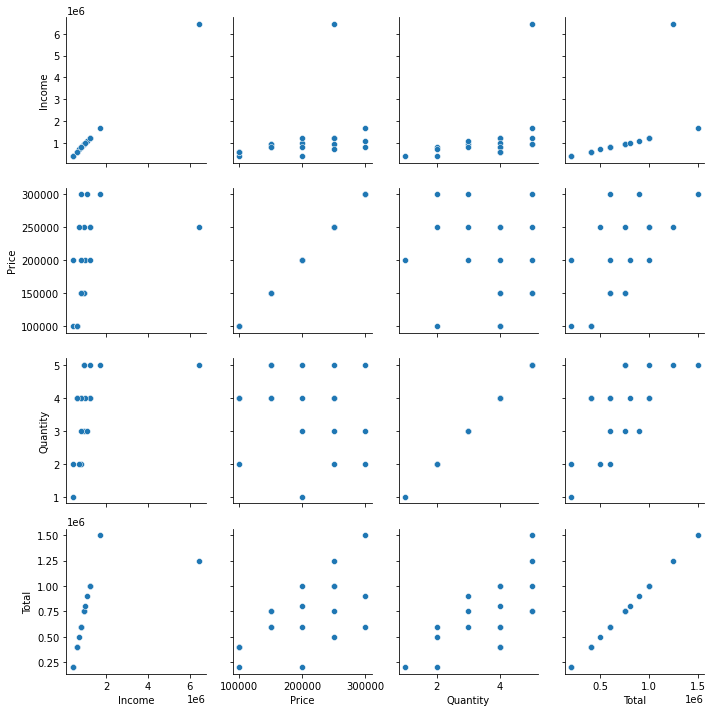

In [3]:
# Visualize the relationships between variables using pair plot

sns.pairplot(numerical_raw, diag_kind=None)

plt.tight_layout()
plt.show()

Relationships Analysis Conclusion:
- There are linear relationships between income and price; income and quantity, and income and total.
- There is a linear relationship between price and total.
- There is a linear relationship between quantity and total.

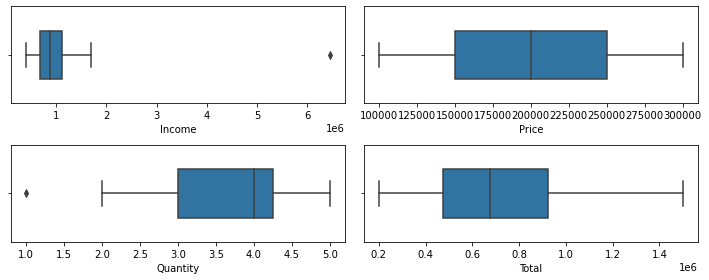

In [4]:
# Visualize each variable distribution using box plot

plt.figure(figsize=(10, 4))

for i, var in enumerate(numerical_raw.columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=numerical_raw[var], width=0.5)
    
plt.tight_layout()
plt.show()

In [5]:
# Calculate the minimum and maximum value limits of income and quantity

Q1 = numerical_raw[['Income', 'Quantity']].quantile(0.25)
Q3 = numerical_raw[['Income', 'Quantity']].quantile(0.75)
IQR = Q3 - Q1

minlim = Q1 - (1.5 * IQR)
maxlim = Q3 + (1.5 * IQR)

print('Minimum Value Limits:')
print(minlim)

print('\nMaximum Value Limits:')
print(maxlim)

print('\nDefault Descriptive Statistics:')
print(numerical_raw[['Income', 'Quantity']].describe())

Minimum Value Limits:
Income      0.000
Quantity    1.125
dtype: float64

Maximum Value Limits:
Income      1800000.000
Quantity          6.125
dtype: float64

Default Descriptive Statistics:
             Income   Quantity
count  2.000000e+01  20.000000
mean   1.160000e+06   3.650000
std    1.282842e+06   1.182103
min    4.000000e+05   1.000000
25%    6.750000e+05   3.000000
50%    8.750000e+05   4.000000
75%    1.125000e+06   4.250000
max    6.450000e+06   5.000000


Transformed Descriptive Statistics:
count    2.000000e+01
mean     9.275000e+05
std      3.708011e+05
min      4.000000e+05
25%      6.750000e+05
50%      8.750000e+05
75%      1.125000e+06
max      1.800000e+06
Name: Income, dtype: float64


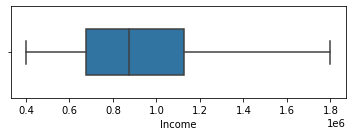

In [6]:
# Substitute maximum outlier in income with the maximum value limit

income_max_outlier = (numerical_raw['Income'] > maxlim['Income'])
numerical_raw['Income'] = numerical_raw['Income'].mask(income_max_outlier, maxlim['Income'])

print('Transformed Descriptive Statistics:')
print(numerical_raw['Income'].describe())

# Visualize income distribution using box plot

plt.figure(figsize=(5, 2))

sns.boxplot(x=numerical_raw['Income'], width=0.5)
    
plt.tight_layout()
plt.show()

Outliers Inspection Conclusion:
- No outliers found in price and total.
- Maximum outlier in income has been fixed.
- Minimum outlier in quantity is insignificant.

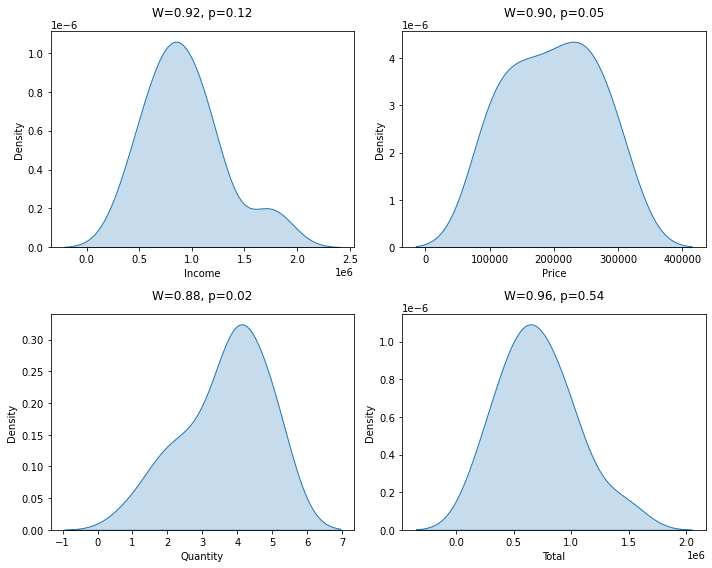

In [7]:
# Visualize each variable distribution using kernel density (kde) plot and make the Shapiro-Wilk results as the title

plt.figure(figsize=(10, 8))

for i, var in enumerate(numerical_raw.columns, 1):
    statistic, pvalue = stats.shapiro(numerical_raw[var])
    
    plt.subplot(2, 2, i)
    sns.kdeplot(x=numerical_raw[var], shade=True)
    
    plt.title('W=%.2f, p=%.2f' % (statistic, pvalue), pad=15)

plt.tight_layout()
plt.show()

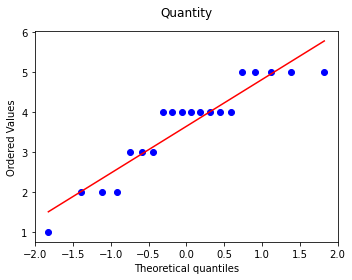

In [8]:
# Visualize quantity distribution using q-q plot

plt.figure(figsize=(5, 4))

stats.probplot(x=numerical_raw['Quantity'], plot=plt)

plt.title('Quantity', pad=15)

plt.tight_layout()
plt.show()

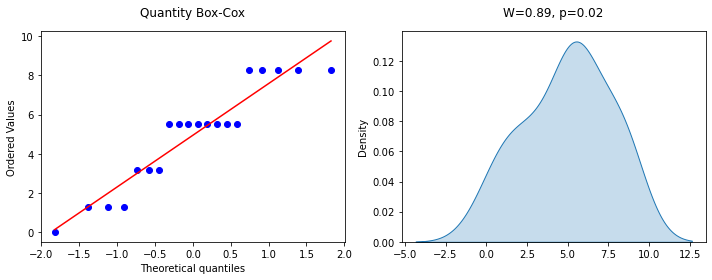

In [9]:
# Transform quantity distribution using box-cox

quantity_boxcox, _ = stats.boxcox(numerical_raw['Quantity'])

# Visualize quantity box-cox distribution using q-q plot and kde plot, and make the Shapiro-Wilk results as the title

statistic, pvalue = stats.shapiro(quantity_boxcox)

plt.figure(figsize=(10, 4))

ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

stats.probplot(x=quantity_boxcox, plot=ax1)
sns.kdeplot(x=quantity_boxcox, shade=True, ax=ax2)

ax1.set_title('Quantity Box-Cox', pad=15)
ax2.set_title('W=%.2f, p=%.2f' % (statistic, pvalue), pad=15)

plt.tight_layout()
plt.show()

Distributions Test Conclusion:
- Total, price, and income have a normal distribution.
- Quantity has no normal distribution.

In [10]:
# Analyze variables heteroscedasticity using Bartlett's Test of Sphericity

statistic, pvalue = stats.bartlett(numerical_raw['Income'], numerical_raw['Price'], numerical_raw['Total'])

print("Bartlett's Test of Sphericity:")
print('statistic=%.2f, p-value=%.2f' % (statistic, pvalue))

print('\nVariance:')
print(numerical_raw[['Income', 'Price', 'Total']].var())

Bartlett's Test of Sphericity:
statistic=38.90, p-value=0.00

Variance:
Income    1.374934e+11
Price     4.861842e+09
Total     1.114737e+11
dtype: float64


Bartlett's Test of Sphericity Conclusion:
- Variance is not equal across all variables (heteroscedasticity).

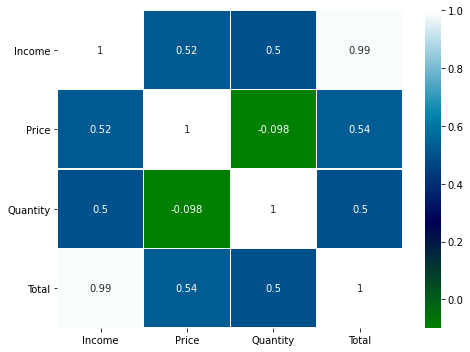

In [11]:
# Analyze the correlations between variables using Kendall's Tau

plt.figure(figsize=(7, 5))

sns.heatmap(numerical_raw.corr(method='kendall'), annot=True, cmap='ocean', linewidth=0.3)

plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

Kendall's Tau Correlation Conclusion:
- There is a strong positive correlation between income and total.
- There are medimum positive correlations between price and total; income and price; income and quantity; as well as quantity and total.
- There is a weak negative correlation between price and quantity.